In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_sal = pd.read_csv('/Users/alex/Downloads/grad.csv')
df_sal.head()
df_sal.describe()

,Graduation Rate,Latitude,Longitude,Crime Percentage
count,157.000000,157.000000,157.000000,157.000000
mean,89.807643,32.807678,-83.741237,25.470004
std,5.346932,1.162764,2.975040,11.281306
min,70.700000,30.750329,-118.291093,0.000000
25%,87.200000,31.842969,-84.455044,15.237209
50%,90.500000,32.802468,-83.572388,31.823485
75%,93.800000,33.770861,-82.703190,33.288262
max,100.000000,34.920821,-81.091203,52.663099


/var/folders/7n/lxg5q6wj75n6y0cw7cfgj7y80000gn/T/ipykernel_8836/4194464023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Crime Percentage'])


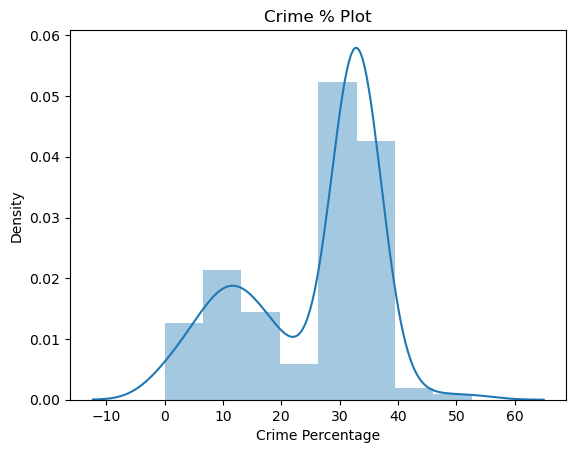

In [3]:
plt.title('Crime % Plot')
sns.distplot(df_sal['Crime Percentage'])
plt.show()

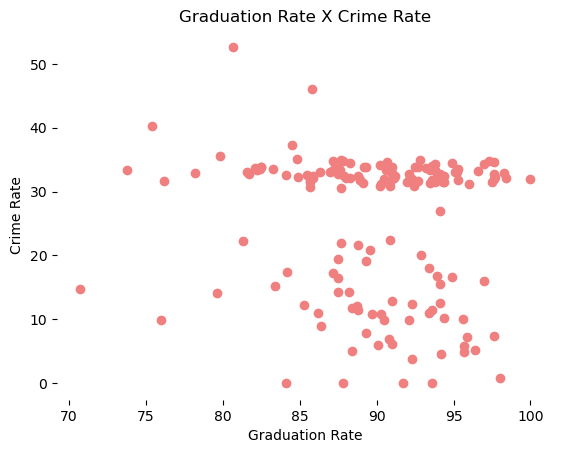

In [4]:
plt.scatter(df_sal['Graduation Rate'], df_sal['Crime Percentage'], color = 'lightcoral')
plt.title('Graduation Rate X Crime Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Crime Rate')
plt.box(False)
plt.show()

In [5]:
data_path = '/Users/alex/Downloads/grad.csv' 
data = pd.read_csv(data_path)
data.dropna(inplace=True)
features = data[['Latitude', 'Longitude', 'Crime Percentage']]
target = data['Graduation Rate']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting graduation rates for the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 5.702304243016999


In [6]:
import folium
from folium.plugins import HeatMap
data_path = '/Users/alex/Downloads/grad.csv'  # Make sure to replace this with the correct path to your file
data = pd.read_csv(data_path)

# Create a base map centered around Georgia
map_center = [33.247875, -83.441162]  # Approximate center of Georgia
georgia_map = folium.Map(location=map_center, zoom_start=7)

# Prepare data for the HeatMap
# We are using Latitude, Longitude, and Graduation Rate for the heat map
# The graduation rate will be used as the weight for the heat map intensity
heat_data = [[row['Latitude'], row['Longitude'], row['Graduation Rate']] for index, row in data.iterrows()]

# Add the heat map layer to the map
HeatMap(heat_data).add_to(georgia_map)

# Save the map to an HTML file (you can open this file in a web browser to view the map)
map_path = '/Users/alex/Downloads/georgia_heat_map.html'  # Choose where to save the HTML file
georgia_map.save(map_path)

# Print the path or handle the map object as needed
print(f"Heat map saved to: {map_path}")

Heat map saved to: /Users/alex/Downloads/georgia_heat_map.html
